# Emmanuel AMELA

In [21]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt

In [3]:
x,y = make_regression(n_samples=100, n_features=2, noise=10) # nous créons des matrice x et y rempli de 100 ligne et d'une colone chacun

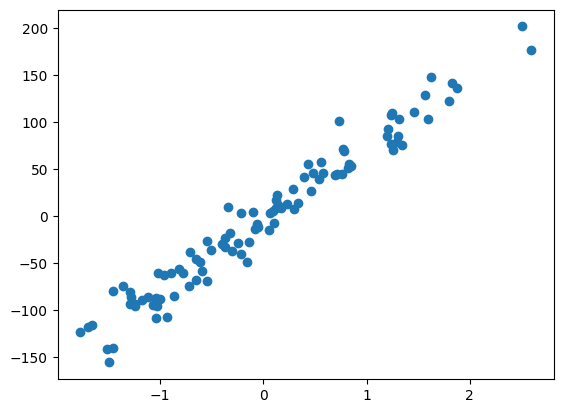

In [4]:
plt.scatter(x[:,0] ,y)# nous trace la courbe


In [5]:
y=y.reshape(100,1)# redimesionne la matrice y  à cause de l'erreur de make regression
print(x.shape)
print(y.shape)

(100, 2)
(100, 1)


In [6]:
X = np.hstack((x, np.ones((x.shape[0],1))))# crer la matice X constituer de plusieurs ligne et 2 colonne avec une 3 eme colomne rempli de 1 
print(X.shape)
print(X[:10])

(100, 3)
[[-1.03504401 -1.0005362   1.        ]
 [ 1.796517   -1.59104892  1.        ]
 [-0.51027683 -0.29468961  1.        ]
 [ 0.39065284  0.06824711  1.        ]
 [ 1.19909589 -0.01631113  1.        ]
 [ 1.62291187  0.96833403  1.        ]
 [ 0.06722436 -0.87669909  1.        ]
 [ 1.2600209  -2.34657659  1.        ]
 [-1.18066226  0.42426749  1.        ]
 [-0.87122674 -0.79860107  1.        ]]


In [7]:
theta = np.random.randn(3,1) # crée le a et b du vecteur theta de manière aléatoire
theta

array([[ 0.65491665],
       [-0.8796115 ],
       [ 0.63628613]])

# Model

In [8]:
def model(X, theta):
    return X.dot(theta)

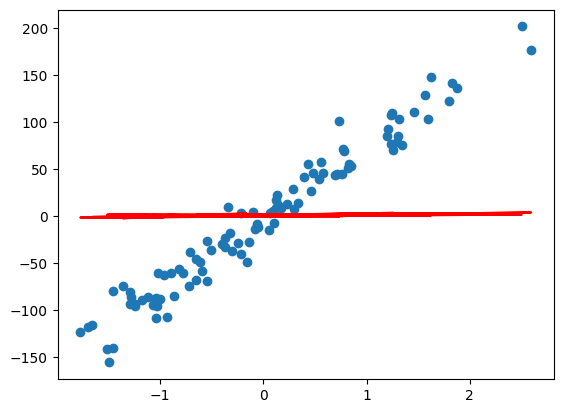

In [9]:
plt.scatter(x[:,0],y)
plt.plot(x[:,0],model(X, theta), c='r')

In [10]:
def cost_function(X , y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta)- y)**2)

In [11]:
cost_function(X, y, theta)

3011.86575831631

# gradients  

In [12]:
def grad (X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

# decente de gradient

In [13]:
def gradient_descent(X, y, theta, learning_rate, n_iteration):
    cost_history = np.zeros(n_iteration)
    for i in range(0, n_iteration):
        theta = theta - learning_rate * grad(X, y, theta)
    return theta, cost_history

# Machine learning

In [14]:
theta_final, cost_history = gradient_descent(X, y, theta, learning_rate = 0.1, n_iteration=1000) # ajutement des variables a et b de theta

In [15]:
theta_final

array([[77.39113982],
       [12.97508845],
       [ 0.48078773]])

Text(0.5, 0, 'temps')

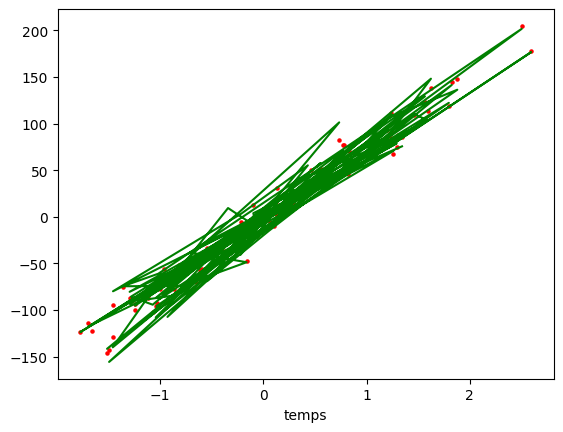

In [16]:
predictions = model (X, theta_final)
plt.plot(x[:,0],y,c='g')
plt.scatter(x[:,0], predictions, c='r', s=5)
plt.xlabel('temps')

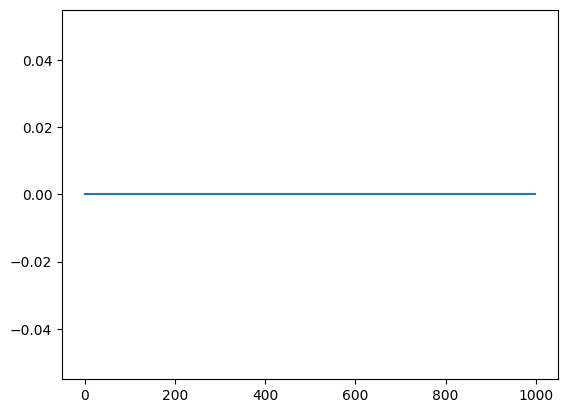

In [17]:
plt.plot(range(1000), cost_history)

# Coeficiant de détermintion r² 

In [18]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()

    v = ((y-y.mean())**2).sum()
    return 1 -u/v

In [19]:
coef_determination(y,predictions)

0.9864111979252719

<IPython.core.display.Javascript object>


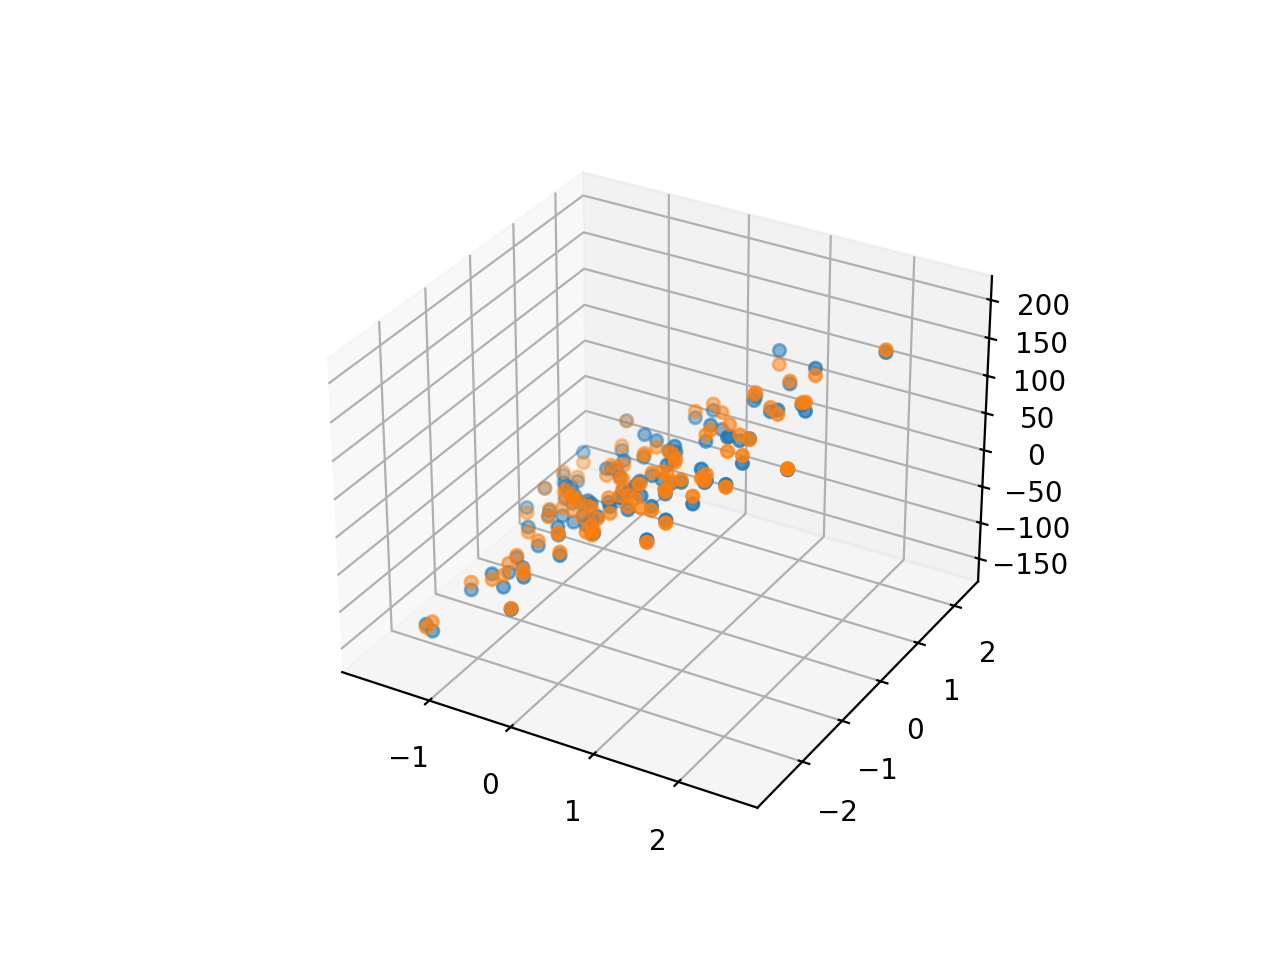

In [20]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
fig = plt.figure()
ax  = fig.add_subplot(111, projection='3d')
ax.scatter(x[:,0],x[:,1],y)
ax.scatter(x[:,0],x[:,1],predictions)